In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [4]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# **EDA**

Text(45, 19, 'Mean age: 38.1')

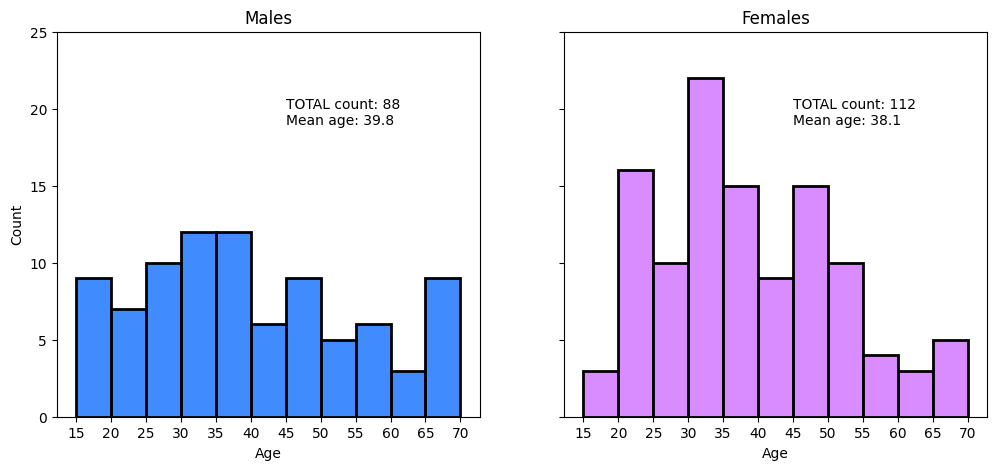

In [9]:
males_age= df.loc[df.Gender=='Male','Age']
females_age= df.loc[df.Gender=='Female','Age']

age_bins= range(15,75,5)

#Creamos los Subplots

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5),sharey=True)

#Plot histograma Male
sns.histplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45, 20, f"TOTAL count: {males_age.count()}")
ax1.text(45, 19, f"Mean age: {males_age.mean():.1f}")


#Plot histograma Female
sns.histplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45, 20, f"TOTAL count: {females_age.count()}")
ax2.text(45, 19, f"Mean age: {females_age.mean():.1f}")

In [10]:
#Creo un group by con Gender y el Age (rangos) como index
medians_by_age_group = df.groupby(['Gender',pd.cut(df.Age,age_bins)]).median()
#Le cambio el nombre a el Index 'Age'
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group

CustomerID   Age  Annual Income (k$)  Spending Score (1-100)
Gender Age_group                                                              
Female (15, 20]        112.0  19.0                63.0                    50.0
       (20, 25]         46.0  23.0                39.0                    65.0
       (25, 30]        139.5  29.0                74.5                    73.0
       (30, 35]        126.0  32.0                70.0                    69.0
       (35, 40]        138.5  38.0                73.5                    41.0
       (40, 45]        137.0  44.0                73.0                    28.0
       (45, 50]         82.0  49.0                54.0                    44.5
       (50, 55]         87.0  54.0                57.0                    43.0
       (55, 60]         74.0  58.0                50.0                    35.0
       (60, 65]         79.0  64.0                51.5                    39.0
       (65, 70]         79.5  67.5                53.5                    51.0
Male   (15, 20]         80.5  19.0                53.5                    47.5
       (20, 25]         32.0  24.0                31.0                    76.0
       (25, 30]        159.0  28.0                82.0                    72.0
       (30, 35]        150.0  33.0                78.0                    63.0
       (35, 40]        131.0  38.5                71.0                    65.0
       (40, 45]        151.0  43.0                78.0                    20.0
       (45, 50]        102.0  48.0                61.5                    38.5
       (50, 55]         46.5  53.0                39.5                    37.5
       (55, 60]         81.0  59.0                54.0                    15.0
       (60, 65]         65.0  64.0                48.0                    51.0
       (65, 70]         77.0  67.5                51.5                    47.0

In [11]:
#Le agrego indices
medians_by_age_group.reset_index(inplace=True)
medians_by_age_group

,Gender,Age_group,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,Female,"(15, 20]",112.0,19.0,63.0,50.0
1,Female,"(20, 25]",46.0,23.0,39.0,65.0
2,Female,"(25, 30]",139.5,29.0,74.5,73.0
3,Female,"(30, 35]",126.0,32.0,70.0,69.0
4,Female,"(35, 40]",138.5,38.0,73.5,41.0
5,Female,"(40, 45]",137.0,44.0,73.0,28.0
6,Female,"(45, 50]",82.0,49.0,54.0,44.5
7,Female,"(50, 55]",87.0,54.0,57.0,43.0
8,Female,"(55, 60]",74.0,58.0,50.0,35.0
9,Female,"(60, 65]",79.0,64.0,51.5,39.0


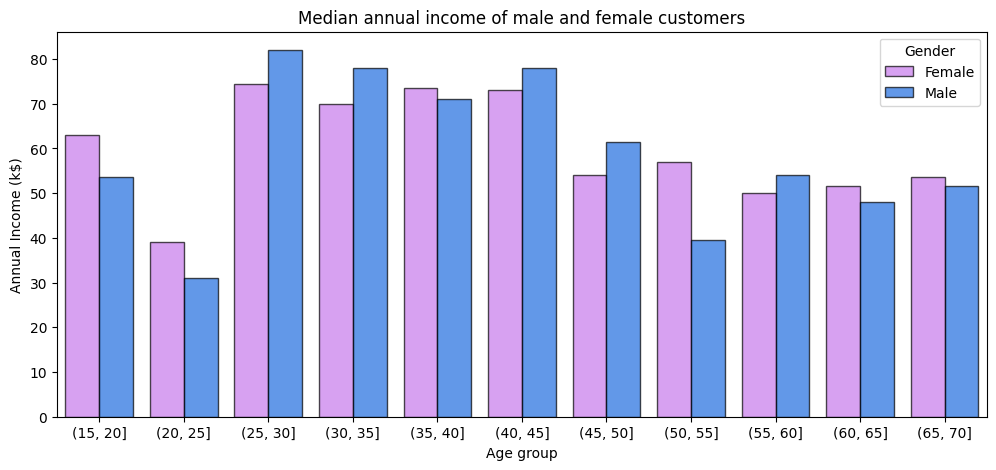

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

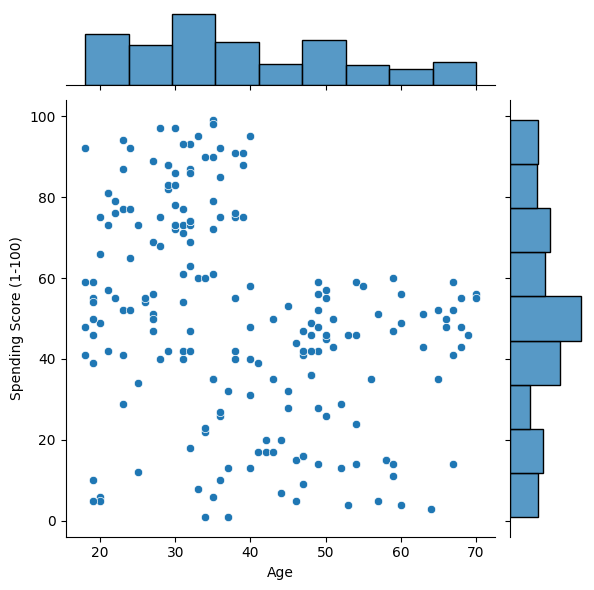

In [13]:
sns.jointplot(data=df,x='Age',y='Spending Score (1-100)')


In [14]:
#Calculamos la correlacion de person
from scipy.stats import pearsonr

corr,p_value= pearsonr(x=df.Age,y=df['Spending Score (1-100)'])

print(f'corr: {corr}')
print(f'p_value: {p_value:0.9f}')

corr: -0.3272268460390901
p_value: 0.000002250


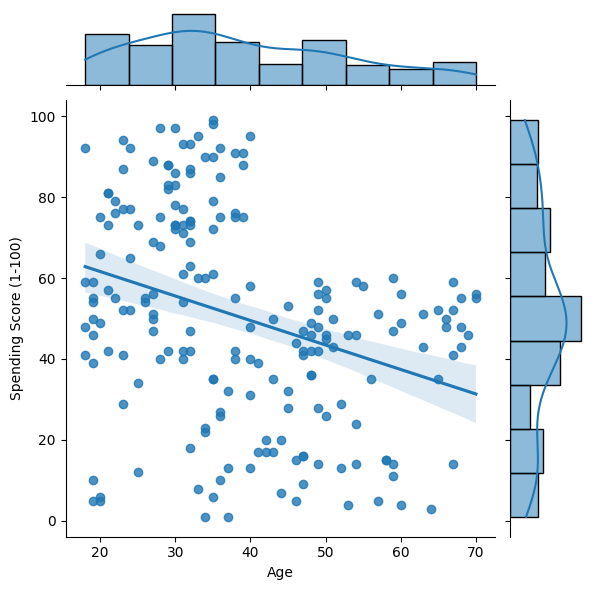

In [15]:
#Agrego una linea de regresion
jp=sns.jointplot(data=df, x = df['Age'], y = df['Spending Score (1-100)'],
                    kind='reg')
jp


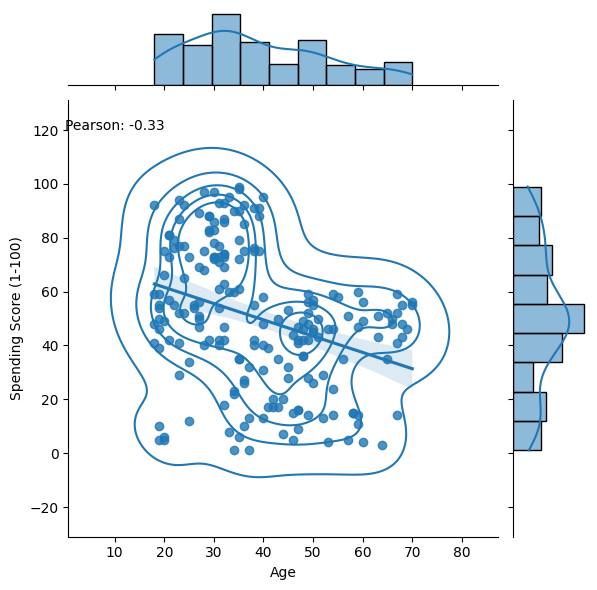

In [16]:
# Agrego un mapa de densidad kernel (kde) y el coeficiente de pearson
sns.jointplot(data=df, x = df['Age'], y = df['Spending Score (1-100)'],
                    kind='reg').plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()


# **PREPROCESAMIENTO**

In [17]:
#Aplicamos LabelEncoder para transformar la variable categorica y en numerica
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [18]:
#Creo un array con los variables numericas
X = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']][:].values # Tambien podria ser X = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

#Convierto el array en float
X=X.astype(float)

X






array([[ 19.,  15.,  39.],
       [ 21.,  15.,  81.],
       [ 20.,  16.,   6.],
       [ 23.,  16.,  77.],
       [ 31.,  17.,  40.],
       [ 22.,  17.,  76.],
       [ 35.,  18.,   6.],
       [ 23.,  18.,  94.],
       [ 64.,  19.,   3.],
       [ 30.,  19.,  72.],
       [ 67.,  19.,  14.],
       [ 35.,  19.,  99.],
       [ 58.,  20.,  15.],
       [ 24.,  20.,  77.],
       [ 37.,  20.,  13.],
       [ 22.,  20.,  79.],
       [ 35.,  21.,  35.],
       [ 20.,  21.,  66.],
       [ 52.,  23.,  29.],
       [ 35.,  23.,  98.],
       [ 35.,  24.,  35.],
       [ 25.,  24.,  73.],
       [ 46.,  25.,   5.],
       [ 31.,  25.,  73.],
       [ 54.,  28.,  14.],
       [ 29.,  28.,  82.],
       [ 45.,  28.,  32.],
       [ 35.,  28.,  61.],
       [ 40.,  29.,  31.],
       [ 23.,  29.,  87.],
       [ 60.,  30.,   4.],
       [ 21.,  30.,  73.],
       [ 53.,  33.,   4.],
       [ 18.,  33.,  92.],
       [ 49.,  33.,  14.],
       [ 21.,  33.,  81.],
       [ 42.,  34.,  17.],
 

In [19]:
pip install gap-stat

In [20]:

from gap_statistic import OptimalK

#Determino el numero optimo de clusters

n_clusters = OptimalK(n_jobs=-1) #El -1 define que se utilizaran todos los CPU

n_clusters_g =n_clusters(X, cluster_array=np.arange(1, 7))

n_clusters_g

6

# **MODELO DBSCAN**

In [21]:
from sklearn.preprocessing import StandardScaler
#Estandarizo las variables
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled



array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [22]:
from sklearn.cluster import DBSCAN

#Entrenamos el modelo

dbscan=DBSCAN(eps=0.4,min_samples=5)

dbscan.fit(X_scaled)



DBSCAN(eps=0.4)

In [23]:
labels = dbscan.labels_

labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,  1,  2, -1, -1,  1,
        2,  2,  3,  1,  1,  1,  3,  2,  1,  3,  2,  3, -1,  3,  2,  1,  3,
        2,  2,  3,  1,  3,  3,  3,  2,  1, -1,  2,  1,  3, -1,  3,  1,  2,
        1,  3,  2, -1,  1,  4,  2,  1, -1, -1,  2,  1,  2,  1,  2,  2,  1,
        4,  2,  1,  2,  4,  1,  4,  4,  4,  2, -1,  2,  2,  2,  4,  1,  1,
        1,  2, -1, -1, -1, -1,  5, -1, -1, -1,  5, -1,  5, -1,  5, -1,  5,
       -1,  5, -1,  5, -1,  5, -1,  5, -1,  5, -1,  5, -1,  5, -1,  5, -1,
        5, -1,  5, -1,  5, -1,  5, -1,  5, -1,  5, -1,  5, -1,  5, -1, -1,
       -1,  5, -1,  5, -1,  5, -1, -1, -1,  5, -1,  5, -1,  5, -1, -1, -1,
       -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [24]:
n_clusters_dbscan = len(set(labels))- (1 if -1 in labels else 0) #set arma una lista con  los distintos valores
n_clusters_dbscan

6

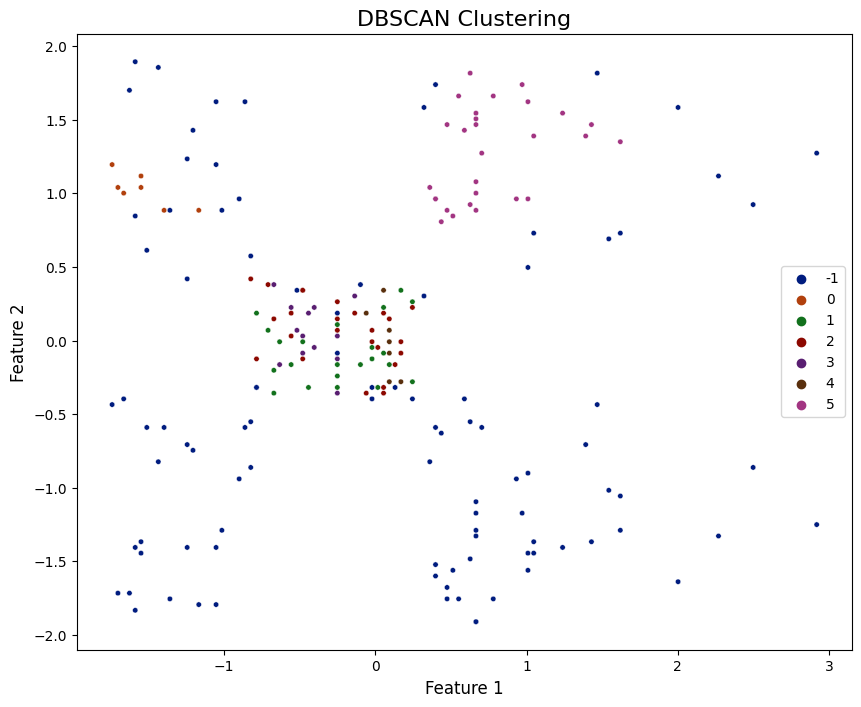

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_scaled[:,1], y=X_scaled[:,2], hue=labels,palette= 'dark', s=15)
plt.title('DBSCAN Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

# **PARAMETER GRID**

In [26]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

#Defimos el diccionarios de hiperparametros (Parameter Grid) que se probaran mediate en la busqueda

param_grid= {
    'n_clusters':range(2,n_clusters_g+1),
    'init': ['k-means++', 'random'], #Método de inicialización para los centroides de los clusters
    'n_init': [5, 10, 15], #Número de veces que se ejecutará el modelo con diferentes centroides iniciales.
    'max_iter': [100, 200, 300, 400, 500], #Número máximo de iteraciones permitidas para cada ejecución del modelo
    'tol': [0.0001, 0.001, 0.01], #Tolerancia para la convergencia del algoritmo
    'algorithm': ['auto', 'full', 'elkan'], #Algoritmo a utilizar para el cálculo de modelo
    'random_state': [0, 42, 100] #Semilla para la generación de números aleatorios
}


#Definimos el modelo con el que vamos a realizar la busqueda de los hiperparametros

kmeans = KMeans(random_state=42)

#Realizamos la busqueda de los hiperparametros con GridSearch

grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X)

grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


{'algorithm': 'auto',
 'init': 'random',
 'max_iter': 100,
 'n_clusters': 6,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.01}

# **MODELO KMEANS (NO JERARQUIZADOS)**

In [27]:
from sklearn.metrics import silhouette_score

# calculamos la suma de los cuadrados intra-cluster (WCSS) para diferentes número de clusters
# Buscamos el número óptimo de clusters que minimiza la WCSS, lo que a menudo se conoce como "Elbow Method" (método del codo)
wcss=[]

for i in range(2,11):
  #Aplicamos los parametros optimos
  kmeans = KMeans(n_clusters=i,
                  init=grid_search.best_params_['init'],
                  max_iter=grid_search.best_params_['max_iter'],
                tol=grid_search.best_params_['tol'],
                algorithm='lloyd', #Lo corregimos por problemas con las versiones futuras de sklearn
                n_init=grid_search.best_params_['n_init'],
                random_state=42
                )
  #Entrenamos el modelo
  kmeans.fit(X)
  #Incorporamos la WCSS a la lista wcss
  wcss.append(kmeans.inertia_)

  #Predecimos los cluster correspondientes
  cluster_labels = kmeans.fit_predict(X)

  #Vemos la metrica silueta promedio (1: clusters bien definidos, -1: clusteres superpuestos o mal definidos, 0: Muy cerca los limites de los clusters o ambiguo)
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(cluster_labels)
  print(f'For n_clusters = {i}, the average silhouette score is : {round(silhouette_avg, 2)}')






[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
For n_clusters = 2, the average silhouette score is : 0.29
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
For n_clusters = 3, the average silhouette score is : 0.38
[1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1

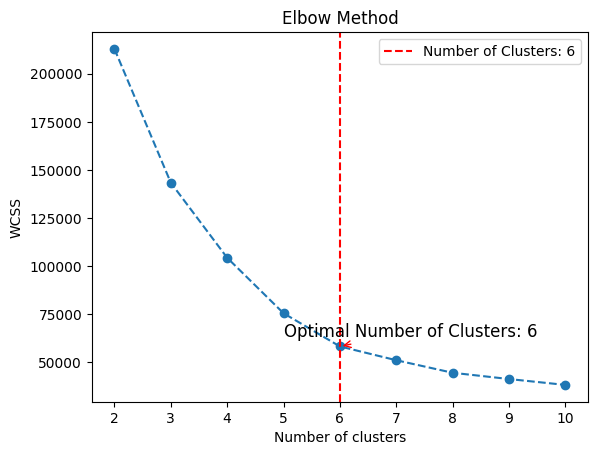

In [28]:
plt.plot(range(2, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Add a vertical line indicating the number of clusters
n_clusters_g = grid_search.best_params_['n_clusters']
plt.axvline(x=n_clusters_g, linestyle='--', color='red', label=f'Number of Clusters: {n_clusters_g}')
plt.annotate(f'Optimal Number of Clusters: {n_clusters_g}', xy=(n_clusters_g, wcss[n_clusters_g-2]), xytext=(n_clusters_g-1, wcss[n_clusters_g-2]+5000),
            arrowprops=dict(arrowstyle='->',lw=1, color='red'), fontsize=12)
plt.legend()
plt.show()

In [29]:
#Ahora corremos el Kmeans pero con el numero correcto de Clusters

kmeans = KMeans(n_clusters=6,
                  init=grid_search.best_params_['init'],
                  max_iter=grid_search.best_params_['max_iter'],
                tol=grid_search.best_params_['tol'],
                algorithm='lloyd', #Lo corregimos por problemas con las versiones futuras de sklearn
                n_init=grid_search.best_params_['n_init'],
                random_state=42
                )
kmeans.fit(X)

KMeans(init='random', max_iter=100, n_clusters=6, n_init=10, random_state=42,
       tol=0.01)

In [30]:
#Creamos un df independiente del principal al cual le agregamos la columna con la segmentacion
df_segm_kmeans = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].copy()
labels = kmeans.labels_
df_segm_kmeans['Segment K-means'] = labels

df_segm_kmeans







,Age,Annual Income (k$),Spending Score (1-100),Segment K-means
0,19,15,39,2
1,21,15,81,1
2,20,16,6,2
3,23,16,77,1
4,31,17,40,2
...,...,...,...,...
195,35,120,79,5
196,45,126,28,3
197,32,126,74,5
198,32,137,18,3


In [31]:
#Mostramos los centroides de cada segmento
centroids = kmeans.cluster_centers_
centroids

array([[27.41025641, 57.02564103, 48.76923077],
       [25.27272727, 25.72727273, 79.36363636],
       [44.31818182, 25.77272727, 20.27272727],
       [41.64705882, 88.73529412, 16.76470588],
       [56.34090909, 53.70454545, 49.38636364],
       [32.69230769, 86.53846154, 82.12820513]])

In [32]:
df_segm_analysis= df_segm_kmeans.groupby('Segment K-means').mean()
df_segm_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Segment K-means,,,
0,27.410256,57.025641,48.769231
1,25.272727,25.727273,79.363636
2,44.318182,25.772727,20.272727
3,41.647059,88.735294,16.764706
4,56.340909,53.704545,49.386364
5,32.692308,86.538462,82.128205


In [33]:
#Agregamos el tamaño de cada segmento

df_segm_analysis['N Obs'] = df_segm_kmeans.groupby(['Segment K-means']).size()
df_segm_analysis

,Age,Annual Income (k$),Spending Score (1-100),N Obs
Segment K-means,,,,
0,27.410256,57.025641,48.769231,39
1,25.272727,25.727273,79.363636,22
2,44.318182,25.772727,20.272727,22
3,41.647059,88.735294,16.764706,34
4,56.340909,53.704545,49.386364,44
5,32.692308,86.538462,82.128205,39


In [34]:
#Agregamos el porcentaje de cada segmento
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Age,Annual Income (k$),Spending Score (1-100),N Obs,Prop Obs
Segment K-means,,,,,
0,27.410256,57.025641,48.769231,39,0.195
1,25.272727,25.727273,79.363636,22,0.110
2,44.318182,25.772727,20.272727,22,0.110
3,41.647059,88.735294,16.764706,34,0.170
4,56.340909,53.704545,49.386364,44,0.220
5,32.692308,86.538462,82.128205,39,0.195


In [35]:
#Le asignamos los nombres a los segmentos de acuerdo a los datos
df_segm_analysis.rename({0:'Joven Ingreso Moderado',
                         1:'Joven Ingreso Bajo',
                         2:'Adulto Ingreso Bajo',
                         3:'Adulto Ingreso Alto',
                         4:'Adulto Mayor Ingreso Moderado',
                         5:'Joven Ingreso Alto'})


,Age,Annual Income (k$),Spending Score (1-100),N Obs,Prop Obs
Segment K-means,,,,,
Joven Ingreso Moderado,27.410256,57.025641,48.769231,39,0.195
Joven Ingreso Bajo,25.272727,25.727273,79.363636,22,0.110
Adulto Ingreso Bajo,44.318182,25.772727,20.272727,22,0.110
Adulto Ingreso Alto,41.647059,88.735294,16.764706,34,0.170
Adulto Mayor Ingreso Moderado,56.340909,53.704545,49.386364,44,0.220
Joven Ingreso Alto,32.692308,86.538462,82.128205,39,0.195


In [36]:
#Utilizamos los nombres definidos para modificar el df de segmentacion Kmeans

df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Joven Ingreso Moderado',
                                                                  1:'Joven Ingreso Bajo',
                                                                  2:'Adulto Ingreso Bajo',
                                                                  3:'Adulto Ingreso Alto',
                                                                  4:'Adulto Mayor Ingreso Moderado',
                                                                  5:'Joven Ingreso Alto'
                                                                  })
df_segm_kmeans

,Age,Annual Income (k$),Spending Score (1-100),Segment K-means,Labels
0,19,15,39,2,Adulto Ingreso Bajo
1,21,15,81,1,Joven Ingreso Bajo
2,20,16,6,2,Adulto Ingreso Bajo
3,23,16,77,1,Joven Ingreso Bajo
4,31,17,40,2,Adulto Ingreso Bajo
...,...,...,...,...,...
195,35,120,79,5,Joven Ingreso Alto
196,45,126,28,3,Adulto Ingreso Alto
197,32,126,74,5,Joven Ingreso Alto
198,32,137,18,3,Adulto Ingreso Alto


In [37]:
import plotly.express as px

#Graficamos el scatter plot con los segmentos

fig = px.scatter_3d(df_segm_kmeans,x='Age',y='Annual Income (k$)',z='Spending Score (1-100)',color='Labels',symbol='Labels', opacity=0.7, size_max=10)

fig.update_layout(
    title={
        'text': "Segmentation Chart",
        'y':0.95,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'
        },
    scene=dict(
        xaxis=dict(title='Ages'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)')),
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="Blue"))

fig.show()

# **MODELO HIERARCHICAL CLUSTERING (JERARQUIZADOS)**

In [38]:

from sklearn.cluster import AgglomerativeClustering

#Entrenamos el modelo definiendo la distancia ('affinity' - Como se mide la distacia entre los puntos) y la similitud ('ward' - Como se une un punto a un nuevo grupo)
agg_cluster = AgglomerativeClustering(n_clusters=6,affinity='euclidean', linkage='ward')

agg_cluster.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', n_clusters=6)

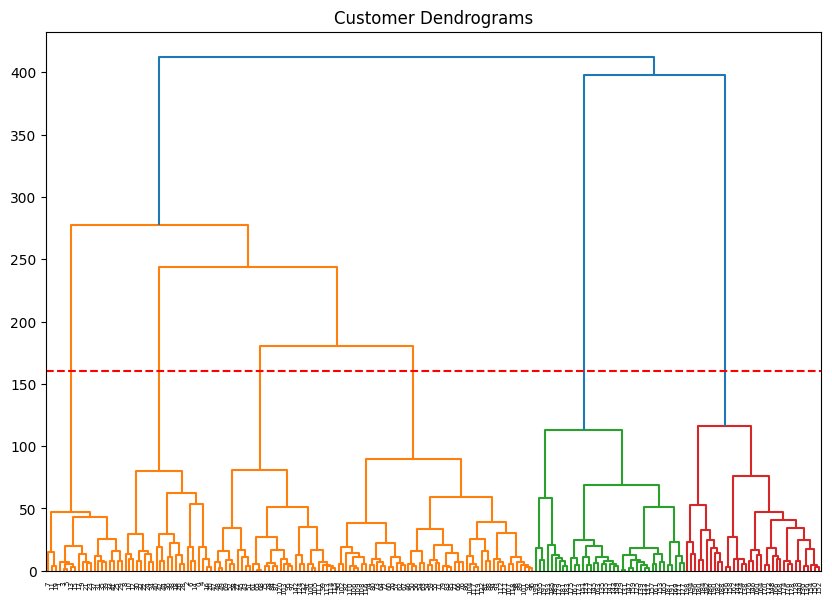

In [42]:
import scipy.cluster.hierarchy as shc

#Grafico del la hierarchical clustering

plt.figure(figsize=(10,7))

dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.title("Customer Dendrograms")
plt.axhline(y=160, color='r', linestyle='--')
plt.show()

Text(0, 0.5, 'Distance')

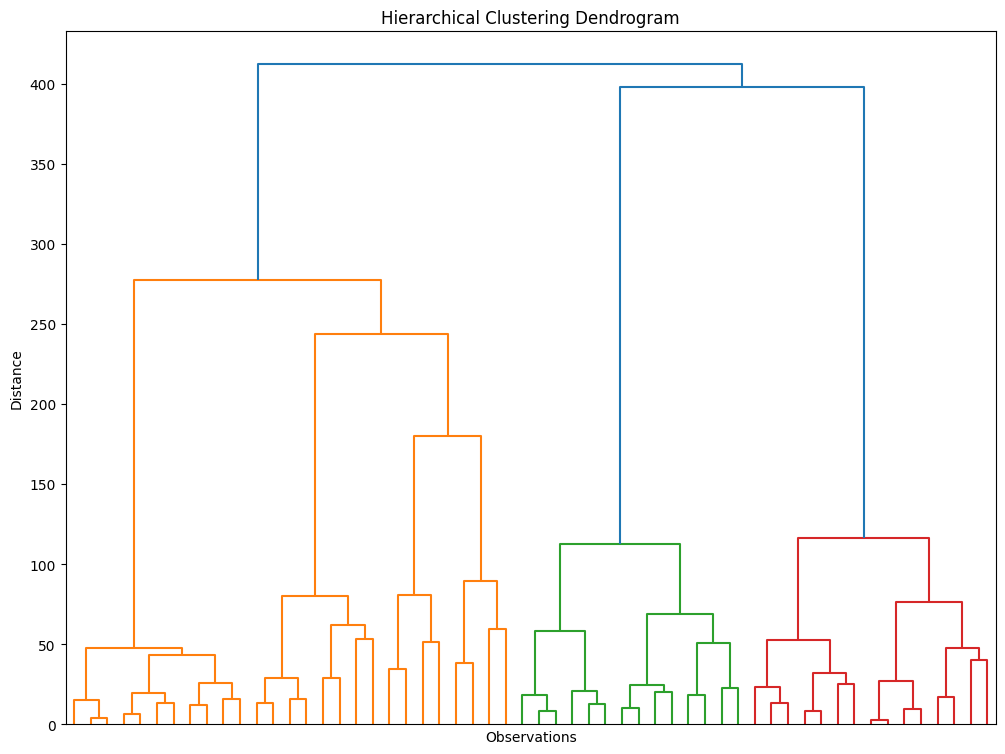

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Para mejorar el Hierarchical Clustering los resultados son devueltos como una linkage matrix

plt.figure(figsize = (12,9))

dendrogram(linkage(X, method = 'ward'),
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
